## Content

- **Problem Statement**
- **Data Notation**
    
- **Geometric Intuition**
    

- **Best fit line**

- **Errors or Residual**
    - Interactive Visualisation of w and b
   
- **Optimization**
  - Mean Squared Error
  - Gradient Descent





---

## 1. Problem Statement

---





- There is an automobile company **Cars24** from Japan which aspires to **enter** the **US market** by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

- They want to **understand** the **factors affecting the pricing of cars** in the American market, since those may be very different from the Japanese market. Essentially, the company wants to know:

  - Which variables are significant in predicting the price of a car
  - How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

<center><img src="https://drive.google.com/uc?id=1tAtkrEiNmmpbXrKhzX-WNGIr-_01qqkr" width="600" height="300"> </center>

##### Business Objective:
- You as a **Data scientist** are required to apply some data science techniques to come up with **price of cars**. That should help the management to understand how exactly the prices vary with different features of car. 





In [ ]:
# importing numpy and pandas
import numpy as np
import pandas as pd

In [ ]:
!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 42.4MB/s]


- This is the clean data of Cars24 that we will be using here, as you already gone through EDA & pre-processing steps.

In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


---
<a name = Section4></a>
## 2. Data Notation
---

<center><img src="https://drive.google.com/uc?id=1nsD3OMFaNar-D8s3a8dp_gSS8JMM9iGB" width="800" height="400"> </center>

- Assume that we are given n cars datapoints. This is our historical data.
- We have bunch of features f1, f2 .... fd.
- xi represents n or d features corresponding to the ith car.
- yi is the price for the ith car.
- Using this historical data, we come up with a model .
- x here is d dimensional representation of the point.
- y is real number which tells the price of the car.
- Our goal in ML is to find this model.

<center><img src="https://drive.google.com/uc?id=1wGyRgXMRUH8sTacKD6M0aSnDNlhKY3Jc" width="800" height="400"> </center>


- Assume that using the historical data, we found Model which maps our input x to our output value `y`.
- Now, given a new car, (xq ), we pass it to model.
- Model should be able to prediction expected price. 
- Predicted price is denoted using yq_hat. We use hat notation for predicted value.
- Our model is doing a very good job if  yq_hat (predicted price) is very close to yq (actual price)

Let us understand the phases of a model

<center><img src="https://drive.google.com/uc?id=1VqildOR_9kAUhUvqlMrRYi8sFSOzGf0s" width="900" height="600"> </center>

####  Are we doing classification or regression? 
Ans: Since we have to predict continuous numeric value, we are doing **regression task**


---
## 3. What approach should we take for this problem?
---

A simple approach is to check how **Y** depends on **X** and draw a trend line.

#### Before moving to a trend line, let's discuss what is a line ?
- Looking at the graph below , what is that we can find?



<center><img src="https://drive.google.com/uc?id=1N9bL_9P3KtQhCjDnjIzULXQezE2DP25G" width="900" height="500"> </center>

<h3 align="left">Equation of a line</h3>

<center><img src="https://drive.google.com/uc?id=1WgNxc3mjH9dBl2HXDSWRIElTSFnDWY7Y" width="800" height="500"> </center>

- Note : If we observe the equation of a line we are predicting the value of y using the value of x. So y here is your dependent variable and x is independent variable.

<center><img src="https://drive.google.com/uc?id=1tHZSlChlcWwSTmqmwk6xurqs8WDUnrAD" width="800" height="600"> </center>







---
## 5. Geometric Intuition 
---

<center><img src="https://drive.google.com/uc?id=1qcziOoCxF4EcbjS8Q0ymc08_FORn0Pgl" width="800" height="450"> </center>












#### Best fit line

<center><img src="https://drive.google.com/uc?id=1h4WrUjJGdS_rME1vZXjHTaFa0DlvQegP" width="700" height="450"> </center>

- Most of the points are closer to 2nd line.
- 1st and 3rd lines are very far from the points.

#### Errors or Residual
<center><img src="https://drive.google.com/uc?id=1dr0jof-XkrDoqCe52q1PmgOZO8isdwuL" width="800" height="650"> </center>

- Error is the difference between the actual value of y and the predicted value of y.
- We could take sum of all the errors.


##  But there is a issue while taking sum of errors? Any guess why?

<center><img src="https://drive.google.com/uc?id=1lFNZR4DjMBzL4eRqLO3-jwhtRpSEIjEE" width="800" height="400"> </center>


- But there is an issue with this error. It can be both positive and negative.
- There can be case the error are large value but the sum of error is coming out to be 0.
- Positive and negative values are cancelling out
- Refer to the example in the image above.

<center><img src="https://drive.google.com/uc?id=1t7xkTwjI7PuuJnHyKuImOJBjTiqalr61" width="800" height="400"> </center>

- We don't want our errors to cancel out.
- The solution to this problem is taking the squares of the errors.
- The method where we use **reducing the sum of the squares** is called **Ordinary Least Sqaures**.
- That means linear regression uses **Ordinary Least Sqaures**




#### Code implementation 
- Here to show code implementaion of geometric intuition we will using same dataset but without clean part,so that we develop better understanding.
- We will predicting price of a car using Max_power      

In [ ]:
!gdown 1RRbLfbAPiihXP50KDQQc6Cr52-r0fsoF

Downloading...
From: https://drive.google.com/uc?id=1RRbLfbAPiihXP50KDQQc6Cr52-r0fsoF
To: /content/train-cars24-car-price.csv
100% 1.25M/1.25M [00:00<00:00, 26.9MB/s]


In [ ]:
# Displaying our data
import pandas as pd
import numpy as np
data = pd.read_csv('/content/train-cars24-car-price.csv')
data.head()

,full_name,selling_price,year,seller_type,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti SX4 Zxi BSIII,2.85,2007.0,Individual,110000,Petrol,Manual,15.00,1586.0,104.68,5.0
1,Hyundai i20 Sportz 1.4 CRDi,4.70,2012.0,Dealer,70000,Diesel,Manual,21.90,1396.0,88.76,5.0
2,Maruti Swift VDI BSIV,5.25,2015.0,Individual,70000,Diesel,Manual,25.20,1248.0,74.00,5.0
3,Honda City 1.3 EXI,1.25,2005.0,Individual,90000,Petrol,Manual,13.00,1343.0,90.00,5.0
4,Volkswagen Polo 1.2 MPI Comfortline,4.65,2015.0,Dealer,41000,Petrol,Manual,16.47,1198.0,74.00,5.0


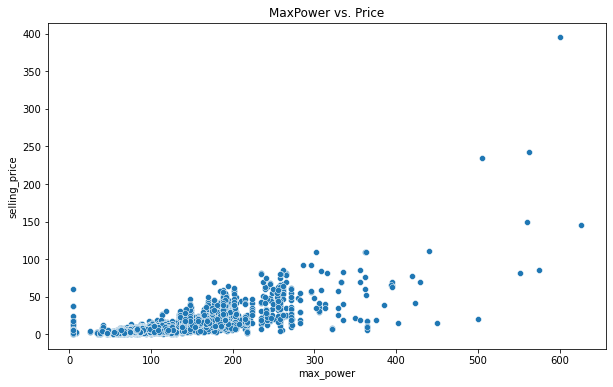

In [ ]:
# using single feature to predict selling price of a car
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('MaxPower vs. Price')
sns.scatterplot(data=data, x='max_power', y='selling_price');

Apart from a few exceptions, the points seem to form a line. We'll try and "fit" a line using this points, and use the line to predict price for a given max power. A line on the X&Y coordinates has the following formula:

$y = wx + b$

The line is characterized two numbers: $w$ (called "slope") and $b$ (called "intercept"). 

### Model

In the above case, the x axis shows "max_power" and the y axis shows "selling price of a car". Thus, we're assume the following relationship between the two:

$price = w \times maxpower + b$

We'll try determine $w$ and $b$ for the line that best fits the data. 

* This technique is called _linear regression_, and we call the above equation a _linear regression model_, because it models the relationship between "max_power" and "price" as a straight line. 

* The numbers $w$ and $b$ are called the _parameters_ or _weights_ of the model.

* The values in the "max_power" column of the dataset are called the _inputs_ to the model and the values in the "selling_price" column are called "targets". 

Let define a helper function `estimate_charges`, to compute $price$, given $maxpower$, $w$ and $b$.

In [ ]:
def estimate_charges(maxpower, w, b):
    return w * maxpower + b

The `estimate_charges` function is our very first _model_.

Let's _guess_ the values for $w$ and $b$ and use them to estimate the value for price.

In [ ]:
w = 50
b = 100

In [ ]:
maxpower = data.max_power
estimated_charges = estimate_charges(maxpower, w, b)

We can plot the estimated charges using a line graph.

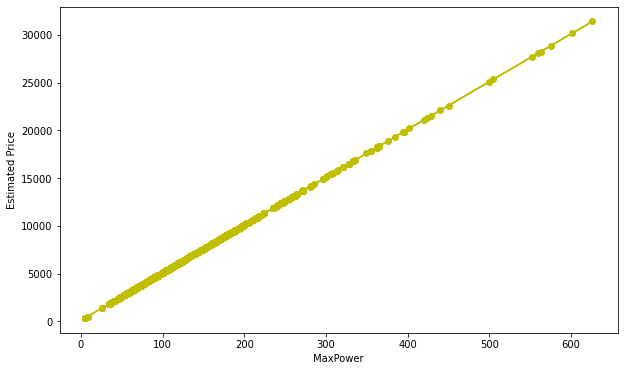

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges, 'y-o');
plt.xlabel('MaxPower');
plt.ylabel('Estimated Price');

As expected, the points lie on a straight line. 

We can overlay this line on the actual data, so see how well our _model_ fits the _data_.

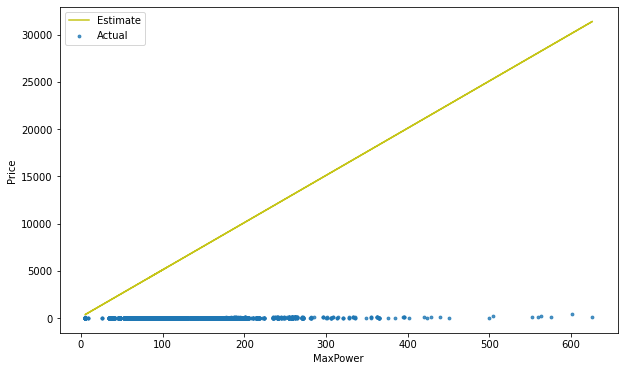

In [ ]:
target = data.selling_price	
plt.figure(figsize=(10,6))
plt.plot(maxpower, estimated_charges, 'y', alpha=0.9);
plt.scatter(maxpower, target, s=8,alpha=0.8);
plt.xlabel('MaxPower');
plt.ylabel('Price')
plt.legend(['Estimate', 'Actual']);

Clearly, the our estimates are quite poor and the line does not "fit" the data. However, we can try different values of $w$ and $b$ to move the line around. Let's define a helper function `try_parameters` which takes `w` and `b` as inputs and creates the above plot.

In [ ]:
def try_parameters(w, b):
    maxpower = data.max_power
    target = data.selling_price
    
    estimated_charges = estimate_charges(maxpower, w, b)
    plt.figure(figsize=(10,6))
    plt.plot(maxpower, estimated_charges, 'r', alpha=0.9);
    plt.scatter(maxpower, target, s=8,alpha=0.8);
    plt.xlabel('MaxPower');
    plt.ylabel('Price')
    plt.legend(['Estimate', 'Actual']);

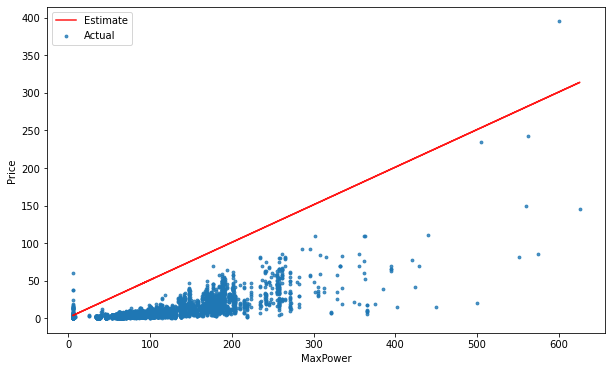

In [ ]:
try_parameters(0.5, 1)

**Observation:**
- By trying different parameters we see line here is moving towards our points.

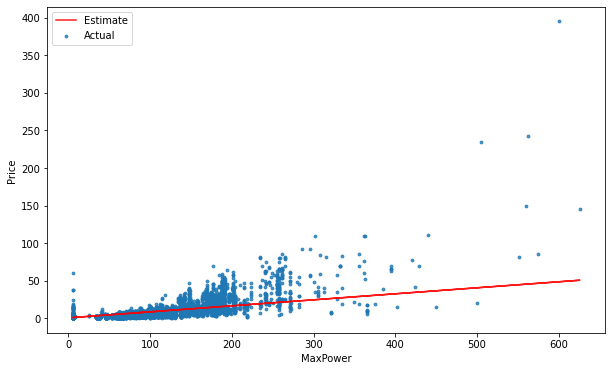

In [ ]:
try_parameters(0.08, 0.5)

**Observation:**

As we change the values, of $w$ and $b$ manually, trying to move the line visually closer to the points, we are _learning_ the approximate relationship between "max_power" and "price". 

Wouldn't it be nice if a computer could try several different values of `w` and `b` and _learn_ the relationship between "max_power" and "price"? To do this, we need to solve a couple of problems:

1. We need a way to measure numerically how well the line fits the points.

2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the the fit.

If we can solve the above problems, it should be possible for a computer to determine `w` and `b` for the best fit line, starting from a random guess.

#### Interactive Visualisation of w and b

- Each time we are changing these parameters and line is adjusting itself.

<center><img src="https://drive.google.com/uc?id=1om0cIV3EJRjPJNEb6WFhj8Ym_PAOIklg" width="800" height="450"> </center>



- Click on the link to try yourself: https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_en.html



## Optimization
- It is a method that computer use to find optimal values of w and b.
- Its uses Gradient descent on top of your cost function to do so.
- Let's see step by step how it works.

#### Cost Function

- It is a function that measures the performance of a Machine Learning model for given data. 
- Cost Function quantifies the error between predicted values and expected values and presents it in the form of a single real number.
- We use MSE as our Cost function in linear regression

#### Mean Squared Error

<center><img src="https://drive.google.com/uc?id=1gVLLUfjr4qf1JX3UQu2dISsItQ9PfMaP" width="800" height="400"> </center>

- Here, the error equation is also referred to as loss function/cost function.
- We are trying to minimize our cost function i.e our mean sum of squared error.

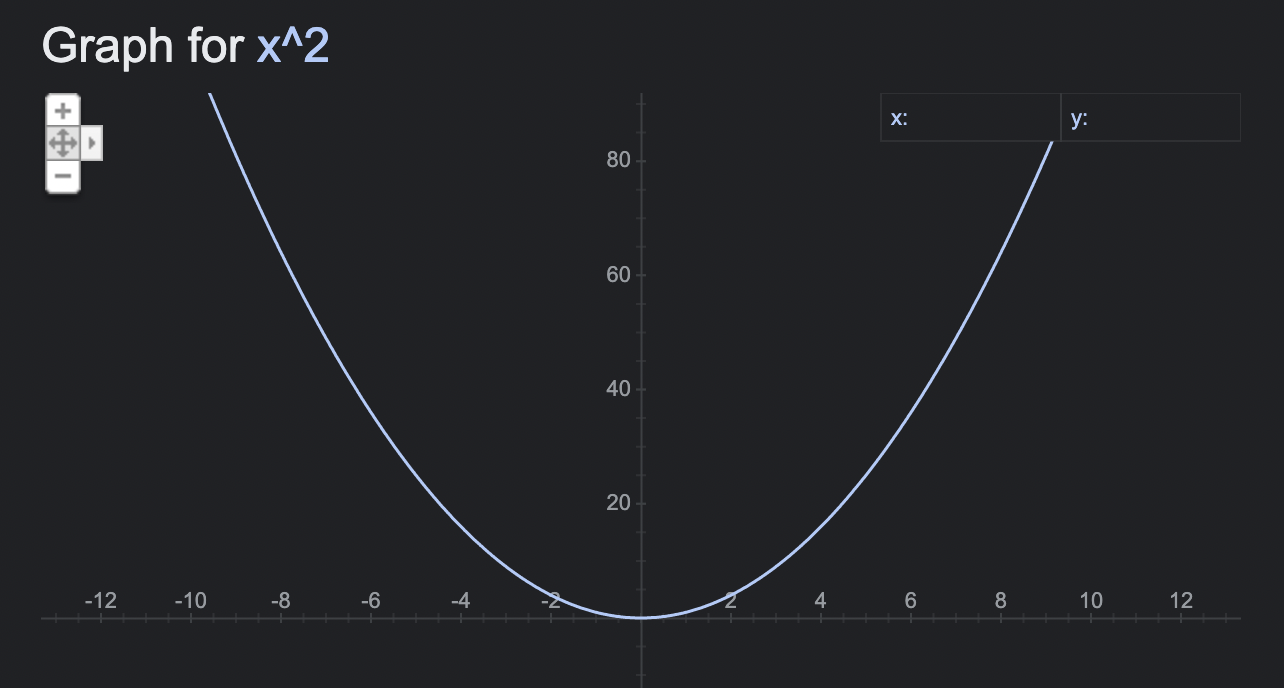

#### Gradient Descent
- We minimized the error by trial and error above — just trying lots of values and visually inspecting the resulting graph. 
- There must be a better way? Queue gradient descent. 

<center><img src="https://drive.google.com/uc?id=1u2sOY650Ed5EbJl23UsNxL7Z0uYSrkeW" width="600" height="400"> </center>

- Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error cost function.

- **Gradient Descent** basically just does what we were doing by hand — change the parameters, bit by bit, until we hopefully arrived a minimum. 


#### Movement of ball from right to left from a curve slope in first quadrant
- Consider we have the equation of line y=mx+c then,

- The algorithm starts with some value of m and c (usually starts with m=0, c=0). We calculate MSE (cost) at point m=0, c=0.
- Let say the MSE (cost) at m=10, c=10 is 100. Then we change the value of m and c by some amount (Learning Step). 
- We will notice a decrease in MSE (cost). We will continue doing the same until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy).




#### Interactive visualisation Gradient descent
- It will show how in steps Gradient descent happens
  - Select a random starting point
  - Set your step size/learning rate
  - Click on next interation to see the magic!

<center><img src="https://drive.google.com/uc?id=1CrLy9R-aHKmP4FWkYeHsjZPEfopZZWP_" width="800" height="450"> </center>

- Click on the link to try it yourself:https://uclaacm.github.io/gradient-descent-visualiser/#playground

